In [85]:
import pandas as pd
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# Reading demographic csv
demo_df = pd.read_csv('../Dataset/Demographic_CSV/DEMO.csv')

# Reading examination csv
ex_df = pd.read_csv('../Dataset/Examination_CSV/BMX_J.csv')

# Loading the lab csv files 
lab_csv_directory = "../Dataset/Lab_CSV"
lab_dfs = {}
for filename in os.listdir(lab_csv_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(lab_csv_directory, filename)
        df = pd.read_csv(file_path)
        lab_dfs[filename[:-4]] = df
print('Lab dataframes: ',sorted(lab_dfs.keys()))

# Loading the questionnaire csv files 
q_csv_directory = "../Dataset/Questionnaire_CSV"
q_dfs = {}
for filename in os.listdir(q_csv_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(q_csv_directory, filename)
        df = pd.read_csv(file_path)
        q_dfs[filename[:-4]] = df
print('\nQuestionnaire dataframes: ',sorted(q_dfs.keys()))

Lab dataframes:  ['BIOPRO_J', 'CBC_J', 'COT_J', 'CRCO_J', 'FERTIN_J', 'FETIB_J', 'GHB_J', 'GLU_J', 'HDL_J', 'HEPA_J', 'HEPBD_J', 'HSCRP_J', 'INS_J', 'PBCD_J', 'TCHOL_J', 'TFR_J', 'TRIGLY_J', 'VIC_J', 'VID_J', 'VITAEC_J']

Questionnaire dataframes:  ['DIQ_J', 'HEQ_J', 'KIQ_U_J', 'MCQ_J', 'RHQ_J']


In [106]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Respondent ID  9254 non-null   float64
 1   Gender         9254 non-null   float64
 2   Age            9254 non-null   float64
dtypes: float64(3)
memory usage: 217.0 KB


In [105]:
demo_df.describe()

,Respondent ID,Gender,Age
count,9254.000000,9254.000000,9.254000e+03
mean,98329.500000,1.507564,3.433423e+01
std,2671.544029,0.499970,2.550028e+01
min,93703.000000,1.000000,5.397605e-79
25%,96016.250000,1.000000,1.100000e+01
50%,98329.500000,2.000000,3.100000e+01
75%,100642.750000,2.000000,5.800000e+01
max,102956.000000,2.000000,8.000000e+01


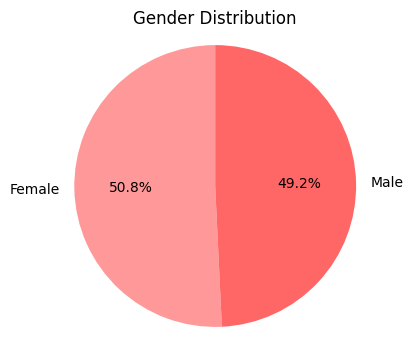

In [133]:
# Occurrences of each gender
gender_counts = demo_df['Gender'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=['Female', 'Male'], colors=['#FF9999', '#FF6666'],
        autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

In [126]:
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Respondent ID  8704 non-null   float64
 1   BMI            8005 non-null   float64
dtypes: float64(2)
memory usage: 136.1 KB


In [130]:
ex_df.describe()

,Respondent ID,BMI
count,8704.000000,8005.000000
mean,98315.452091,26.577502
std,2669.112899,8.260724
min,93703.000000,12.300000
25%,96000.750000,20.400000
50%,98308.500000,25.800000
75%,100625.250000,31.300000
max,102956.000000,86.200000


In [87]:
lab_df = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), lab_dfs.values())
lab_df.head()

,Respondent ID,25-hydroxyvitamin D2 + D3 [nmol/L],Fasting Glucose [mmol/L],Insulin [pmol/L],Triglyceride [mmol/L],LDL-Cholesterol(NIH2) [mmol/L],Vitamin C [umol/L],Hepatitis A antibody,Alanine Aminotransferase [U/L],Albumin [g/dL],...,Total Lycopene [umol/L],Retinol [umol/L],Alpha-tocopherol [umol/L],Blood lead [umol/L],Blood cadmium [nmol/L],Blood mercury [nmol/L],Blood selenium [umol/L],Blood manganese [nmol/L],Transferrin receptor [nmol/L],Glycohemoglobin [%]
0,93703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,74.4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.62,2.35,1.81,171.28,30.6,NaN
2,93705.0,89.9,NaN,NaN,NaN,NaN,73.8,1.0,16.0,4.4,...,0.386,2.185,26.006,0.14,2.14,5.34,2.36,155.99,39.8,6.2
3,93706.0,53.8,NaN,NaN,NaN,NaN,63.6,2.0,10.0,4.4,...,0.583,2.042,16.765,0.04,1.87,53.09,2.53,256.10,34.0,5.2
4,93707.0,58.2,NaN,NaN,NaN,NaN,27.4,2.0,13.0,5.2,...,0.499,1.222,22.756,0.02,1.25,1.00,2.28,229.35,34.0,5.6


In [88]:
q_df = reduce(lambda  left,right: pd.merge(left,right,on=['Respondent ID'],how='outer'), q_dfs.values())
q_df.head()

,Respondent ID,Hepatitis C,Congestive_Heart_Failure,Coronary_Heart_Disease,Stroke,Thyroid_Problem,Liver_Condition,Fatty_Liver,Liver_Fibrosis,Liver_Cirrhosis,...,Jaundice,Cancer,Cancer_Type,Anemia,Heart_Attack,Weak/Failing kidneys,Pregnancy,No. of pregnancies,Gestational diabetes,Diabetes
0,93705.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,2.0,2.0,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0
1,93706.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
2,93707.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0
3,93708.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,2.0,2.0,NaN,2.0,2.0,2.0,NaN,3.0,1.0,3.0
4,93709.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,...,2.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2.0


In [89]:
# We have Hepatitis A and B in lab dataset and pregnancy data in questionnaire dataset. 
# We could swap them so that all the diseases stay in the questionnaire data and others in the lab data.
q_df = q_df.merge(lab_df[["Respondent ID","Hepatitis A antibody","Hepatitis B core antibody"]], 
                  on='Respondent ID', how="outer")
lab_df.drop(["Hepatitis A antibody","Hepatitis B core antibody"], axis=1, inplace=True)

lab_df = lab_df.merge(q_df[["Respondent ID","Pregnancy","No. of pregnancies"]], 
                  on='Respondent ID', how="outer")
q_df.drop(["Respondent ID","Pregnancy","No. of pregnancies"], axis=1, inplace=True)

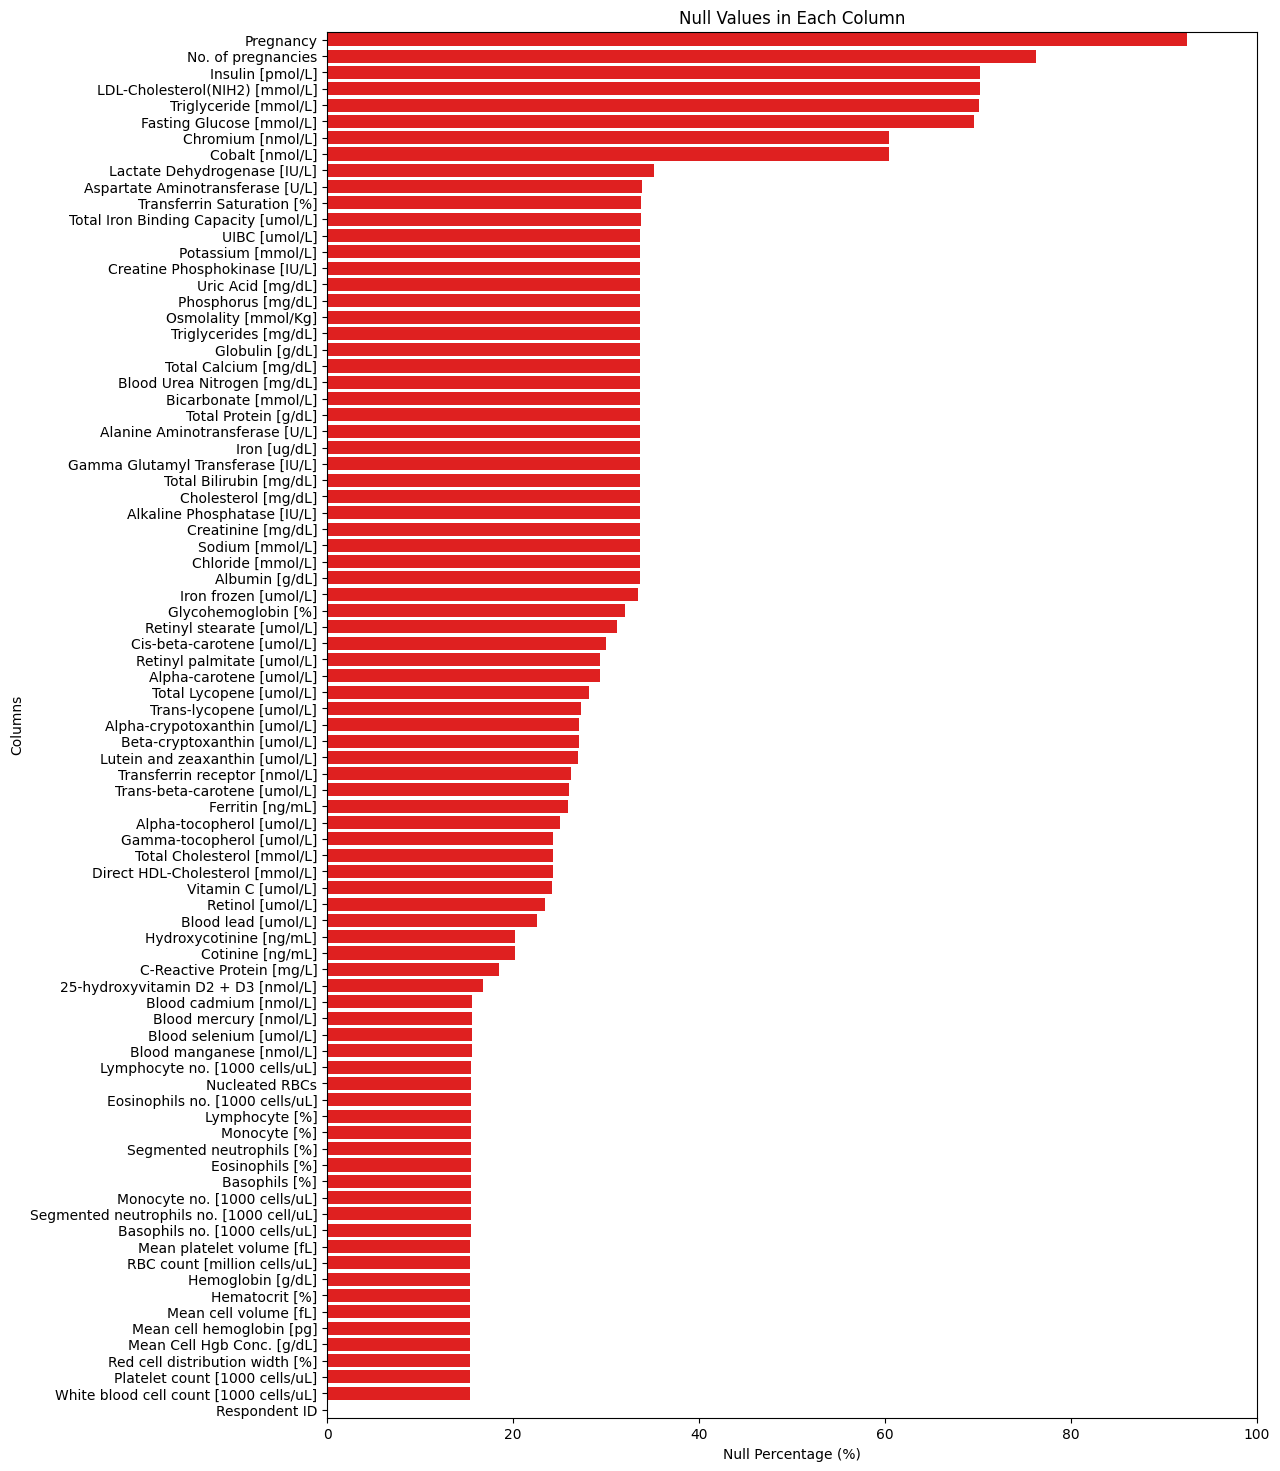

In [90]:
# Percentage of null values in each column of lab data
null_percentage = (lab_df.isnull().sum() / len(lab_df)) * 100

# DataFrame with column names and null percentages
null_data = pd.DataFrame({'Column': null_percentage.index, 'Null Percentage': null_percentage.values})

# DataFrame by null percentage in descending order
null_data = null_data.sort_values(by='Null Percentage', ascending=False)

# Bar plot
plt.figure(figsize=(12,18))
sns.barplot(x='Null Percentage', y='Column', data=null_data, color='red')

plt.xlabel('Null Percentage (%)')
plt.ylabel('Columns')
plt.title('Null Values in Each Column')
plt.xlim(0, 100)
plt.show()

In [91]:
q_df.isnull().sum()

Hepatitis C                  1019
Congestive_Heart_Failure     3328
Coronary_Heart_Disease       3328
Stroke                       3328
Thyroid_Problem              3328
Liver_Condition              3328
Fatty_Liver                  8756
Liver_Fibrosis               8891
Liver_Cirrhosis              8873
Viral_Hepatitis              8847
Autoimmune_Hepatitis         8885
Jaundice                     1019
Cancer                       3328
Cancer_Type                  8309
Anemia                          0
Heart_Attack                 3328
Weak/Failing kidneys         3328
Gestational diabetes         6784
Diabetes                        0
Hepatitis A antibody         1760
Hepatitis B core antibody    2103
dtype: int64